<a href="https://colab.research.google.com/github/kapumota/Cuadernos/blob/main/Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Curso de Inteligencia Artificial


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### Preparación de datos

El conjunto de datos describe a los clientes (`seniority`, `age`, `marital status`, `income` y otras características), el préstamo (la cantidad solicitada, el precio del artículo) y su estado (pagado o no). 


In [ ]:
!gdown 1hMan7eH4tzeoJb9dXl6JFwkw4oNK2xsR

Downloading...
From: https://drive.google.com/uc?id=1hMan7eH4tzeoJb9dXl6JFwkw4oNK2xsR
To: /content/CreditScoring.csv
100% 182k/182k [00:00<00:00, 77.7MB/s]


In [ ]:
df = pd.read_csv('CreditScoring.csv')

In [ ]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
df.columns = df.columns.str.lower()
df.head()
df.shape

(4455, 14)

Aunque la mayoría de las columnas son numéricas, algunas son categóricas: `status`, `home`, `marital[status]`, `records` y `job`. Sin embargo, los valores que vemos en el DataFrame son números, no cadenas. Esto significa que necesitamos traducirlos a sus nombres reales. 

**Para status**

In [ ]:
valores_status = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(valores_status)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


**Para home**

In [ ]:
valores_home= {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(valores_home)

**Para marital**

In [ ]:
valores_marital = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(valores_marital)

**Para records**

In [ ]:
valores_records = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(valores_records)

**Para job**

In [ ]:
valores_job = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(valores_job)


In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


Después de esto, todas las variables categóricas tienen cadenas, no números.
Veamos las variables numéricas: 

In [ ]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


El número `9999999` indican valores faltantes. Vamos a reemplazarlo por NaN: 

In [ ]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [ ]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Después de esta transformación, vemos que no aparecen más números sospechosos en el resumen del dataframe.

In [ ]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Veamos la variable objetivo. 

In [ ]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

Hay un registro cuyo estado es `unknown`. Eliminémoslo, no es útil para nosotros. 

In [ ]:
df = df[df.status != 'unk']

In [ ]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

### Preparación del conjunto de datos 


* Dividimos el conjunto de datos en entrenamiento, validación y prueba. 

* Manejamos valores faltantes. 

* Utilizamos la codificación one-hot para codificar variables categóricas. 

* Creae la matriz de características `X` y la variable objetivo `y`. 


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train_completo, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_completo, test_size=0.25, random_state=11)

In [ ]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

El resultado que queremos predecir es el `status`. Lo usaremos para entrenar un modelo, por lo que es `y`, la variable objetivo.

In [ ]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [ ]:
del df_train['status']
del df_val['status']

Veamos que sucede con los valores faltantes.

In [ ]:
df_train.isnull().sum()

seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

Podemos reemplazar los valores faltantes con cero:

In [ ]:
df_train = df_train.fillna(0).to_dict(orient='records')
df_val = df_val.fillna(0).to_dict(orient='records')

In [ ]:
df_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

Utilizamos la técnica de codificación one-hot para usar las variables categóricas. 

Para implementarlo, usamos `DictVectorizer` de Scikit-learn. 



In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(df_train)
X_val = dv.transform(df_val)


### Árboles de decisión

Usaremos `DecisionTreeClassifier` y para evaluar la calidad de nuestros modelos, usaremos AUC. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


Ajustemos el árbol con parámetros predeterminados 

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Primero, evaluamos el rendimiento en el conjunto de entrenamiento. Debido a que elegimos AUC como la métrica de evaluación, necesitamos puntajes, no predicciones...usamos `predict_proba`.

In [ ]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

Y sobre el conjunto de validación.

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6445381560146278

Ese es un caso de sobreajuste: el modelo en los datos de entrenamiento funciona perfectamente, pero falla en la validación.

Cambiamos el parámetro de profundidad: limitamos el tamaño del árbol a 2 niveles y comprobemos la puntuación: 



In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('auc de entrenamiento: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('auc de validacion: %.3f' % auc)

auc de entrenamiento: 0.705
auc de validacion: 0.669


Para visualizar el árbol que acabamos de aprender, podemos usar la función `export_text` del paquete `true`: 


In [ ]:
from sklearn.tree import export_text
arbol_texto = export_text(dt, feature_names=dv.feature_names_)
print(arbol_texto)

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: False
|   |--- job=partime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



#### Ajuste de paramétros

El proceso de encontrar el mejor conjunto de parámetros se denomina ajuste de parámetros.
En este cuaderno podemos ajustar dos parámetros: 

* `max_depth`

* `min_samples_leaf` 


In [ ]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [ ]:
roc_auc_score(y_val, y_pred)

0.7487012908381971

Comenzamos ajustando `max_ depth`.

In [ ]:
for profundidad in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=profundidad)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (profundidad, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.761
  10 -> 0.695
  15 -> 0.664
  20 -> 0.656
None -> 0.664


A continuación, ajustamos `min_samples_leaf`. Para eso, iteramos sobre los tres mejores parámetros de `max_depth`, y para cada uno, revisamos diferentes valores de `min_samples_leaf`: 


In [ ]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747


In [ ]:
for m in [4, 5, 6]:
    print('profundidad: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

profundidad: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

profundidad: 5
1 -> 0.766
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759

profundidad: 6
1 -> 0.762
5 -> 0.760
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.772
100 -> 0.776
200 -> 0.768



In [ ]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.754
5 -> 0.763
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768


Hemos encontrado los mejores parámetros, así que usemoslos para entrenar el modelo final: 


In [ ]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.7854738320699426

**Ejercicio** Grafica la curva ROC y analiza los resultados.

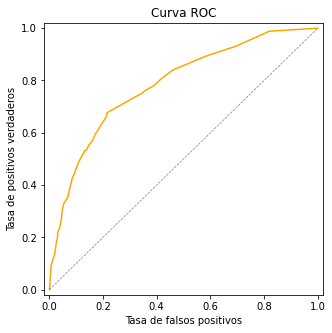

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, color ='orange')
plt.plot([0,1], [0, 1], color = 'black', lw =0.7, linestyle='dashed', alpha = 0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de positivos verdaderos')

plt.title('Curva ROC')

plt.show()

#### Bosque aleatorio

Entrenamiento de un modelo de bosque aleatorio: para entrenar cada árbol, se selecciona aleatoriamente un subconjunto de características. Al hacer la predicción final, combina todas las predicciones en una sola. 


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7831882250369329

Si lo repetimos una vez más, cambia:

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7823981012811508

Para entender cuánto cambia, podemos repetirlo 100 veces y mirar la media y la desviación estándar. 

In [ ]:
aucs = []
for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

media_auc = np.mean(aucs)
std_auc = np.std(aucs)

print('%.3f +- %.3f' % (media_auc,std_auc))
print('%.3f -- %.3f' % (media_auc - std_auc, media_auc + std_auc))

0.785 +- 0.009
0.775 -- 0.794


Para solucionar este problema, configuremos la semilla  para el generador de números aleatorios asignando algún valor al parámetro `random_state`:


In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)


0.7811145285897654

Ahora comprobaremos cómo depende el AUC del número de árboles.

Para ver cuántos árboles necesitamos, podemos iterar sobre diferentes valores de `n_estimators`  y ver su efecto en el AUC:


In [ ]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.815
50 -> 0.816
60 -> 0.817
70 -> 0.818
80 -> 0.818
90 -> 0.820
100 -> 0.819
110 -> 0.819
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.820
160 -> 0.820
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.820


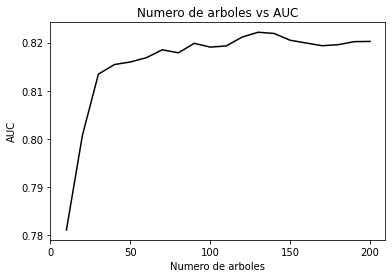

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Numero de arboles vs AUC')
plt.xlabel('Numero de arboles')
plt.ylabel('AUC')

plt.show()

#### Ajuste de parámetros para el bosque aleatorio 

Un conjunto de bosque aleatorio consta de múltiples árboles de decisión, por lo que los parámetros más importantes que debemos ajustar para el bosque aleatorio son los mismos:

* `max_depth` 
* `min_samples_leaf` 

Para `max_depth`:

In [ ]:
todos_aucs = {}

for profundidad in [5, 10, 20]:
    print('profundidad: %s' % profundidad)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=profundidad, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    todos_aucs[profundidad] = aucs
    print()

Ahora, para cada valor de `max_depth`, tenemos una serie de puntuaciones AUC. 

Podemos graficarlos ahora: 


In [ ]:
plt.figure(figsize=(6, 4))

num_arboles = list(range(10, 201, 10))

plt.plot(num_arboles, todos_aucs[5], label='profundidad=5', color='black', linestyle='dotted')
plt.plot(num_arboles, todos_aucs[10], label='profundidad=10', color='black', linestyle='dashed')
plt.plot(num_arboles, todos_aucs[20], label='profundidad=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Numero de arboles vs AUC')
plt.xlabel('Numero de arboles')
plt.ylabel('AUC')

plt.show()

Ahora ajustemos `min_samples_leaf`:

In [ ]:
todos_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    todos_aucs[m] = aucs
    print()

In [ ]:
plt.figure(figsize=(6, 4))

num_arboles = list(range(10, 201, 20))

plt.plot(num_arboles, todos_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_arboles, todos_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_arboles, todos_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Numero de arboles vs AUC')
plt.xlabel('Numero de arboles')
plt.ylabel('AUC')

plt.show()

Logramos el mejor AUC con `200` árboles, por lo que debemos establecer el parámetro `n_estimators` en `200`, `max_depth =10`, `min_samples_leaf=5`. 

Entrenemos el modelo final:


In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

**Ejercicio** Grafica la curva ROC y analiza los resultados.

In [ ]:
### Tu respuesta

###  Gradient boosting

Alternativamente, podemos entrenar modelos secuencialmente: cada modelo siguiente intenta corregir los errores del anterior.

#### XGBoost: Extreme gradient boosting


In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

El siguiente paso es especificar los parámetros para el entrenamiento.

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}


In [ ]:
modelo_xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
y_pred = modelo_xgb.predict(dval)
y_pred[:10]

In [ ]:
roc_auc_score(y_val, y_pred)

#### Seguimiento del rendimiento del modelo 

Se utiliza un `watchlist`, una función integrada en XGBoost para monitorear el rendimiento del modelo.

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}


In [ ]:
modelo_xgb = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

Capturamos esta salida y realizar los gráficos adecuados.

In [ ]:
%%capture salida

modelo_xgb = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [ ]:
def analisis_salida_xgb(salida):
    arbol = []
    aucs_train = []
    aucs_val = []

    for linea in salida.stdout.strip().split('\n'):
        esta_linea, linea_train, linea_val = linea.split('\t')

        it = int(esta_linea.strip('[]'))
        train = float(linea_train.split(':')[1])
        val = float(linea_val.split(':')[1])

        arbol.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return arbol, aucs_train, aucs_val

In [ ]:
arbol, aucs_train, aucs_val = analisis_salida_xgb(salida)

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(arbol, aucs_train, color='black', linestyle='dashed', label='AUC entrenamiento')
plt.plot(arbol, aucs_val, color='black', linestyle='solid', label='AUC validacion')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: numero de arboles vs AUC')
plt.xlabel('Numero de arboles')
plt.ylabel('AUC')

plt.show()

#### Ajuste de parámetros para XGBoost

**Para el parámetro eta**


In [ ]:
%%capture salida

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

modelo_xgb = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
arbol, _, aucs_val_eta_03 = analisis_salida_xgb(salida)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, arbol)))

In [ ]:
%%capture salida

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

modelo_xgb = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
arbol, _, aucs_val_eta_01 = analisis_salida_xgb(salida)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, arbol)))

In [ ]:
%%capture salida

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

modelo_xgb = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
arbol, _, aucs_val_eta_005 = analisis_salida_xgb(salida)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, arbol)))

In [ ]:
%%capture salida

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

modelo_xgb = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
arbol, _, aucs_val_eta_001 = analisis_salida_xgb(salida)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, arbol)))

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(arbol, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(arbol, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('El efecto de eta en el rendimiento del modelo')
plt.xlabel('Numero de arboles')
plt.ylabel('AUC (validacion)')

plt.show()

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(arbol, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(arbol, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(arbol, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('El efecto de eta en el rendimiento del modelo')
plt.xlabel('Numero de arboles')
plt.ylabel('AUC (validacion)')

plt.show()

**Ejercicio** Ajuste de otros parámetros.

Realiza el proceso anterior para los siguientes parámetros `max_depth` para los `valores = 3, 4, 6 10`.

Presenta un gráfico sobre el efecto de `max_depth` para esos valores en el rendimiento del modelo. 


In [ ]:
## Tus respuestas

**Ejercicio** 

Realiza el proceso anterior para los siguientes parámetros `min_child_weight.` para los `valores = 1, 10, 30`.

Presenta un gráfico sobre el efecto de `min_child_weight` para esos valores en el rendimiento del modelo. 

In [ ]:
### Tus respuestas

#### Número óptimo de árboles


In [ ]:
%%capture salida

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

modelo_xgb = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
print(salida)

In [ ]:
arbol, _, aucs_val = analisis_salida_xgb(salida)
print(max(aucs_val))

In [ ]:
max(zip(aucs_val, arbol))

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(arbol, aucs_val, color='black', linestyle='solid')

plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(180, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Seleccionando el numero de arboles')
plt.xlabel('Numero de arboles')
plt.ylabel('AUC (validacion)')

plt.show()

### Prueba del modelo final

**Modelo final**

In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

modelo_xgb = xgb.train(xgb_params, dtrain,
                  num_boost_round=180, verbose_eval=10,
                  evals=watchlist)

In [ ]:
y_pred_xgb = modelo_xgb.predict(dval)

In [ ]:
roc_auc_score(y_val, y_pred_xgb)

In [ ]:
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_rf))
print(roc_auc_score(y_val, y_pred_xgb))

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')

plt.title('Curva ROC')

plt.show()

#### Prueba final

In [ ]:
y_train_completo = (df_train_completo.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_completo['status']
del df_test['status']

In [ ]:
dict_train_completo = df_train_completo.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_completo = dv.fit_transform(dict_train_completo)
X_test = dv.transform(dict_test)

Para un bosque aleatorio.

In [ ]:
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf_final.fit(X_train_completo, y_train_completo)

y_pred_rf = rf.predict_proba(X_test)[:, 1]

Entrenamos el modelo XGBoost usando estos datos y los parámetros óptimos que determinamos previamente: 

In [ ]:
dtrain_completo = xgb.DMatrix(X_train_completo, label=y_train_completo, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_arboles = 160

xgb_final = xgb.train(xgb_params, dtrain_completo, num_boost_round=num_arboles)

In [ ]:
y_pred_xgb = xgb_final.predict(dtest)

In [ ]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

**Ejercicios**

La ingeniería de características es el proceso de crear nuevas características a partir de las existentes. Para este proyecto, no hemos creado ninguna característica, simplemente usamos los proporcionados en el conjunto de datos. Agregar más características debería ayudar a mejorar el rendimiento del modelo.  Experimenta con la ingeniería de más características.



In [ ]:
## Tu respuesta

Cuando entrenamos un bosque aleatorio, obtenemos diferentes modelos seleccionando un subconjunto aleatorio de características para cada árbol. Para controlar el tamaño del subconjunto, usamos el parámetro `max_features`. Intenta ajustar este parámetro y vea si cambia el AUC en la validación. 


In [ ]:
## Tu respuesta

En XGBoost, el parámetro `colsample_bytree` controla la cantidad de características que seleccionamos para cada árbol; es similar a `max_features` del bosque aleatorio. Experimenta con este parámetro y vea si mejora el rendimiento: prueba valores de `0.1` a `1.0` con un paso de `0.1`. 


In [ ]:
## Tu respuesta

Todos los modelos basados en árboles pueden resolver el problema de regresión: predecir un número. En Scikit-learn, `DecisionTreeRegressor` y `RandomForestRegressor`, implementa la variación de regresión de los modelos. En XGBoost, necesitamos cambiar el objetivo a `reg:squarederror`. 

Utiliza estos modelos para predecir el precio del automóvil e intenta resolver también otros problemas de regresión.



In [ ]:
## Tu respuesta